In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["axes.grid"] = False
import mne
import ast

In [2]:
import scipy.signal

In [3]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

In [55]:
sesion = pd.read_csv("datos.csv")[['timestamp', 'sample_number', 'channel_data']]
sesion.channel_data = sesion.channel_data.apply(ast.literal_eval)
# print(sesion.dtypes)
sesion.head()

,timestamp,sample_number,channel_data
0,9751823,1,"[-82056, 132894, 199506, 5737939, 7722698, 771..."
1,9753831,2,"[-82027, 133076, 199606, 5736217, 7722754, 771..."
2,9755838,3,"[-82059, 133411, 199968, 5736073, 7722661, 771..."
3,9757845,4,"[-82052, 133562, 200189, 5736365, 7722684, 771..."
4,9759852,5,"[-81757, 133856, 200192, 5736254, 7722654, 771..."


In [56]:
channel_data_df = sesion.channel_data.apply(pd.Series) * 2.4 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
sesion = pd.concat([sesion.drop('channel_data', axis=1), channel_data_df], axis=1)
sesion.timestamp = sesion.timestamp.apply(lambda x: (x - sesion.timestamp.iloc[0]) / 10 ** 6)
sesion.head()

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,-0.023476,0.038021,0.057079,1.641638,2.209482,2.208648,2.202463,2.201811
1,0.002008,2,-0.023468,0.038073,0.057108,1.641145,2.209498,2.208655,2.202474,2.201833
2,0.004015,3,-0.023477,0.038169,0.057211,1.641104,2.209471,2.208626,2.202448,2.201805
3,0.006022,4,-0.023475,0.038212,0.057275,1.641187,2.209478,2.208632,2.202451,2.201807
4,0.008029,5,-0.023391,0.038297,0.057275,1.641156,2.209469,2.208626,2.202430,2.201791


In [57]:
sesion.shape

(5000, 10)

In [58]:
x1 = sesion.channel_1*1000
x2 = sesion.channel_2*1000
x3 = sesion.channel_3*1000
t = sesion.timestamp

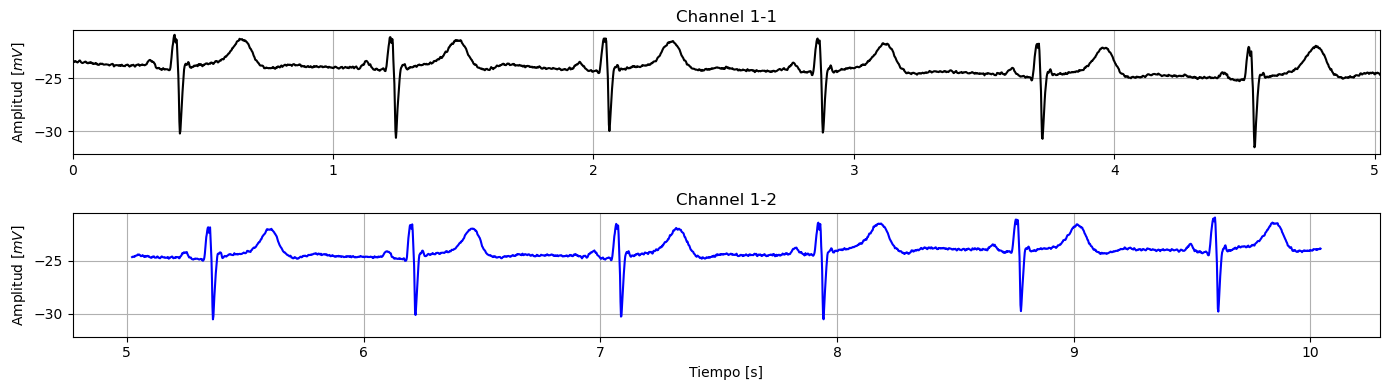

In [59]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x1[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
axs[0].set_title('Channel 1-1')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x1[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
axs[1].set_title('Channel 1-2')
axs[1].grid()

# plt.show()

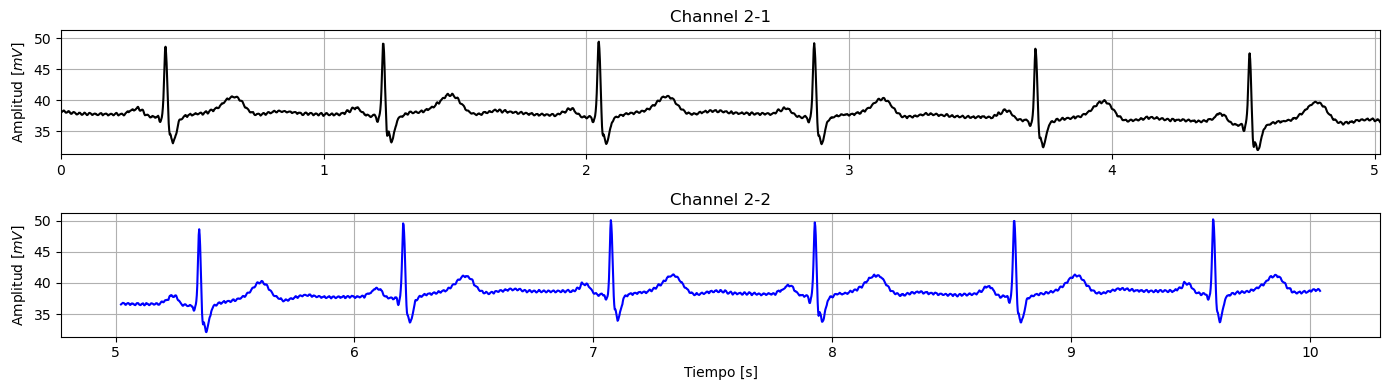

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x2[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
axs[0].set_title('Channel 2-1')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x2[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
axs[1].set_title('Channel 2-2')
axs[1].grid()

# plt.show()

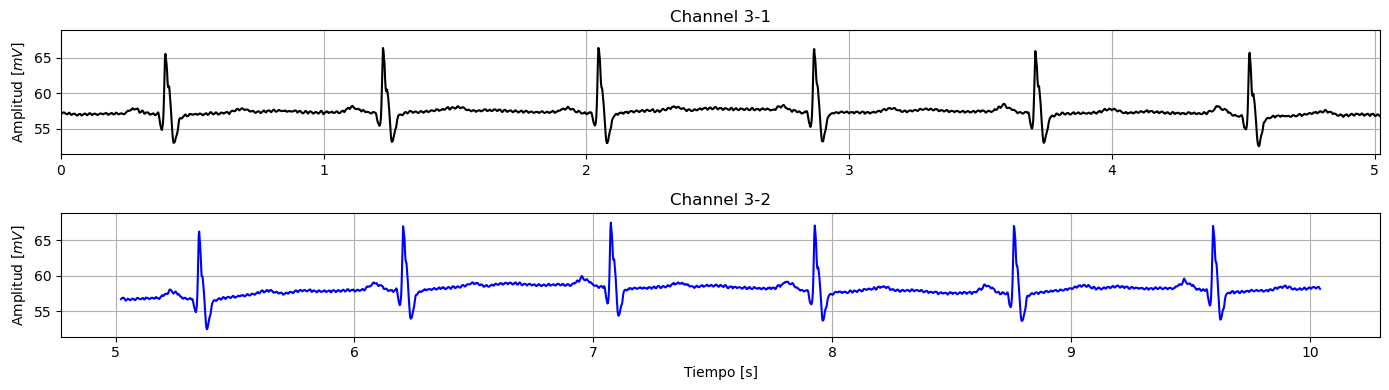

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x3[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x3.min() - abs(x3.min() * 0.02), x3.max() +  abs(x3.max() * 0.02)])
axs[0].set_title('Channel 3-1')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x3[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x3.min() - abs(x3.min() * 0.02), x3.max() +  abs(x3.max() * 0.02)])
axs[1].set_title('Channel 3-2')
axs[1].grid()

# plt.show()

In [62]:
filtered_I = bandpass(x1, [1, 35], 500.)
filtered_II = bandpass(x2, [1, 35], 500.)
filtered_III = bandpass(x3, [1, 35], 500.)

In [19]:
if abs(filtered.max()) > abs(filtered.min()):
    y_lim = [np.mean(filtered) - abs(filtered.max() * 1.2), np.mean(filtered) + abs(filtered.max() * 1.2)]
else:
    y_lim = [np.mean(filtered) - abs(filtered.min() * 1.2), np.mean(filtered) + abs(filtered.min() * 1.2)]

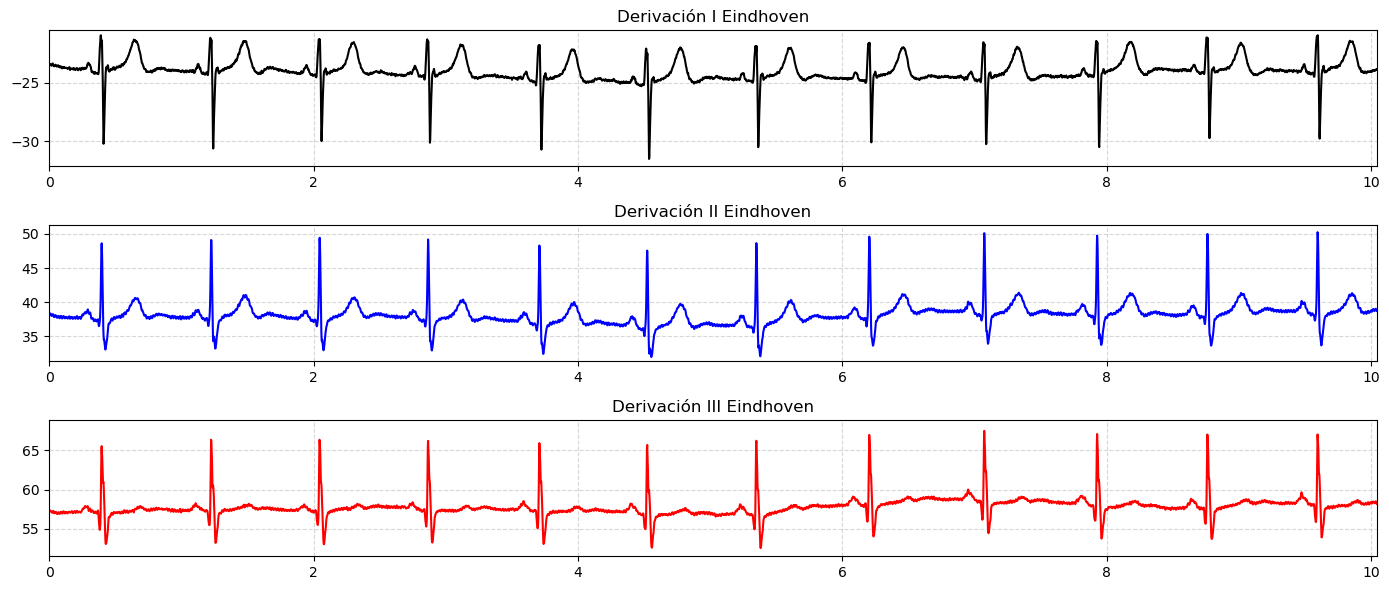

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, num=0, figsize=(14, 6), tight_layout=True)
ax1.plot(t, x1, lw=1.5, color='k')
ax1.set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
ax1.set_xlim([t.min(), t.max()])
ax1.set_title("Derivación I Eindhoven")#"Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')

ax2.plot(t, x2, lw=1.5, color='b')
ax2.set_ylim([x2.min() - abs(x2.min() * 0.02), x2.max() +  abs(x2.max() * 0.02)])
#ax2.set_ylim([-5.2, 5.2])
ax2.set_xlim([t.min(), t.max()])
ax2.set_title("Derivación II Eindhoven")#"Band-Pass IIR Filter (1-35 Hz)")
ax2.grid(alpha=.5, ls='--')

ax3.plot(t, x3, lw=1.5, color='r')
ax3.set_ylim([x3.min() - abs(x3.min() * 0.02), x3.max() +  abs(x3.max() * 0.02)])
ax3.set_xlim([t.min(), t.max()])
ax3.set_title("Derivación III Eindhoven")#"Band-Pass IIR Filter (1-35 Hz)")
ax3.grid(alpha=.5, ls='--')

In [9]:
fs = 500.
info = mne.create_info(['channel_1','channel_2','channel_3','channel_4',
                        'channel_5','channel_6','channel_7','channel_8'], 
                       sfreq=fs, ch_types='eeg')
#info.set_montage('standard_1020')
info['description'] = 'Pruebas de EEG'
info['device_info'] = {'type':'Frontend', 'model':'AD8232'}
info['experimenter'] = 'Eloy'
info['line_freq'] = 50.0
info['subject_info'] = {'id':1,'last_name':'Yapur','first_name':'Jhoseline',
                        'birthday':(2002, 5, 12),'sex':2,'hand':1}
data = sesion.loc[:, 'channel_1':'channel_8'].values.T
eeg_raw = mne.io.RawArray(data, info, verbose=True)

Creating RawArray with float64 data, n_channels=8, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.


In [10]:
eeg_raw.describe()

<RawArray | 8 x 5000 (10.0 s), ~327 kB, data loaded>
ch  name       type  unit        min         Q1     median         Q3        max
 0  channel_1  EEG   µV    2081587.28  2081874.81  2081970.37  2082065.14  2082381.78
 1  channel_2  EEG   µV      -514.13    -498.39    -495.53    -492.67    -476.65
 2  channel_3  EEG   µV    816201.59  816339.49  816374.11  816416.46  816816.43
 3  channel_4  EEG   µV     -1148.99   -1132.11    -131.03     860.88     878.62
 4  channel_5  EEG   µV     -7204.34   -7137.68     844.72    8804.80    8847.14
 5  channel_6  EEG   µV    143184.77  143464.87  143536.39  143604.20  143660.56
 6  channel_7  EEG   µV     -9025.96   -8968.45    3029.39   14954.00   14997.48
 7  channel_8  EEG   µV         0.00       0.00       0.00       0.00       0.00
